In [2]:
#Group 7 -  Neural Network to Recognize Handwritten Digits

#Install packages
! pip install tensorflow keras numpy mnist matplotlib

In [3]:

#import the packages (dependencies)
import numpy as np #Library for mathematical calculations
import mnist #from where we get the data set from
import matplotlib.pyplot as plt #to create the graphs
from keras.models import Sequential #Artificial neural network architecture
from keras.layers import Dense #The layers in the ANN
from keras.utils import to_categorical 

Using TensorFlow backend.


In [0]:
#Load the data set
train_images = mnist.train_images() #training data images
train_labels = mnist.train_labels() #training data labels
test_images = mnist.test_images() #training data images
test_labels = mnist.test_labels() #training data labels

In [5]:

#Normize the images, Normalize the pixel values from [0, 255] tp
# [0, 1] to make our network easier to train
train_images = (train_images/255)  
#Flatten the images. Flatten each 28X28 image into a 28^2 = 784 dimensioinal vector
#to pass into the neural network
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))
#Pring the shape
print(train_images.shape) #60,000 rows and 784 cols
print(test_images.shape)  #10,000 rows and 784 cols

(60000, 784)
(10000, 784)


In [0]:

#Build the model#
#Last layer with 10 neurons and softmax function
model = Sequential()
model.add( Dense(64, activation= 'relu', input_dim= 784))
model.add( Dense(32, activation= 'relu'))
model.add( Dense(16, activation= 'relu'))
model.add( Dense(10, activation= 'softmax'))



In [0]:

#compile the model
#the loss funct measures how well the model did on training 
#and then tries to improve on it, using the optimizer
#Loss function deals with categorical values (not continuous)
#Loss function tells the neural network at 
#the time of learning how far is it from the answer
model.compile(
    optimizer= 'adam',
    loss= 'categorical_crossentropy', #(classes that are greater than 2)
    metrics= ['accuracy']
)


In [8]:

#train the model
model.fit(
    train_images,
     to_categorical(train_labels),
     epochs= 8, #Number of iterations over the entire dataset to train on
     batch_size= 32 #Number of samples per gradient update for training
)

Epoch 1/8
60000/60000 [==============================] - 10s 166us/step - loss: 0.3194 - accuracy: 0.9037
Epoch 2/8
60000/60000 [==============================] - 8s 139us/step - loss: 0.1352 - accuracy: 0.9592
Epoch 3/8
60000/60000 [==============================] - 8s 139us/step - loss: 0.1016 - accuracy: 0.9689
Epoch 4/8
60000/60000 [==============================] - 8s 139us/step - loss: 0.0823 - accuracy: 0.9747
Epoch 5/8
60000/60000 [==============================] - 8s 138us/step - loss: 0.0693 - accuracy: 0.9776
Epoch 6/8
60000/60000 [==============================] - 8s 138us/step - loss: 0.0588 - accuracy: 0.9816
Epoch 7/8
60000/60000 [==============================] - 8s 138us/step - loss: 0.0513 - accuracy: 0.9839
Epoch 8/8
60000/60000 [==============================] - 8s 138us/step - loss: 0.0445 - accuracy: 0.9859


In [9]:

#evaluate the model
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

10000/10000 [==============================] - 1s 76us/step


[22.746274611004733, 0.968999981880188]

In [0]:
#model.save_weights('model.h5')
model.save('MNIST_1.53%_Po-Rong_Lai.h5')

In [11]:
#predict on the first 5 images
predictions = model.predict (test_images[:5])
#print our models prediction
print(np.argmax(predictions, axis = 1))
print(test_labels[:5])

[7 2 1 0 4]
[7 2 1 0 4]


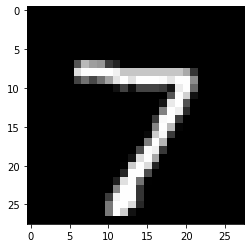

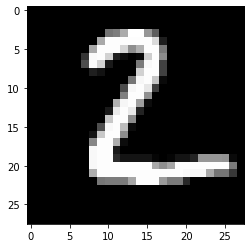

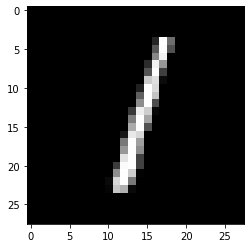

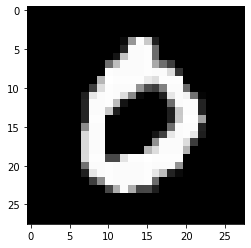

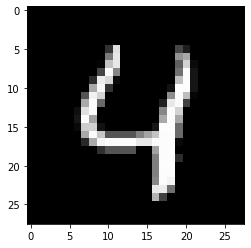

In [12]:
for i in range(0,5):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype = 'float')
  pixels = first_image.reshape((28,28))
  plt.imshow(pixels, cmap = 'gray')
  plt.show()
